In [5]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

In [6]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [7]:
import pandas as pd

In [8]:
macau = pd.read_csv('Datasets/Macau-2022.csv', index_col='date', parse_dates = ['date'])
macau = macau.fillna(method="ffill")
macau.head()

,arrival
date,
2011-01-01,2076066
2011-02-01,2164249
2011-03-01,2190865
2011-04-01,2338449
2011-05-01,2295551


In [9]:
mc_values = macau.values

In [10]:
n_steps = 3

In [11]:
X, y = split_sequence(mc_values, n_steps)

In [12]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [13]:
#Vanilla LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
model.fit(X, y, epochs=50, verbose=0)

In [15]:
#Prediction for Feb 2022
x_input = array([801300, 820870, 694430])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Predicted Value Feb 2022: ", yhat)
feb = 655505
print('Actual arrival volume for Feb 2022: ', feb)
MAPE = abs(feb - yhat)/feb
print("MAPE: %.2f" %(MAPE))

Predicted Value Feb 2022:  788984
Actual arrival volume for Feb 2022:  655505
MAPE: 0.20


In [16]:
#Prediction for March 2022
x_input = array([820870, 694430, 655505])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Prediction for March 2022: ", yhat)
march = 526912
print('Actual arrival volume for March 2022: ', march)
MAPE = abs(march - yhat)/march
print("MAPE: %.2f" %(MAPE))

Prediction for March 2022:  630063
Actual arrival volume for March 2022:  526912
MAPE: 0.20


In [17]:
#Prediction for April 2022
x_input = array([694430, 655505, 526912])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Prediction for April 2022: ", yhat)

Prediction for April 2022:  545380


In [18]:
#Stacked LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:
model.fit(X, y, epochs=50, verbose=0)

In [20]:
#Prediction for Feb 2022
x_input = array([801300, 820870, 694430])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Predicted Value Feb 2022: ", yhat)
feb = 655505
print('Actual arrival volume for Feb 2022: ', feb)
MAPE = abs(feb - yhat)/feb
print("MAPE: %.2f" %(MAPE))

Predicted Value Feb 2022:  797916
Actual arrival volume for Feb 2022:  655505
MAPE: 0.22


In [21]:
#Prediction for March 2022
x_input = array([820870, 694430, 655505])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Prediction for March 2022: ", yhat)
march = 526912
print('Actual arrival volume for March 2022: ', march)
MAPE = abs(march - yhat)/march
print("MAPE: %.2f" %(MAPE))

Prediction for March 2022:  764106
Actual arrival volume for March 2022:  526912
MAPE: 0.45


In [22]:
#Prediction for April 2022
x_input = array([694430, 655505, 526912])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Prediction for April 2022: ", yhat)

Prediction for April 2022:  611055


In [23]:
#Bi-Directional LSTM
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [24]:
model.fit(X, y, epochs=50, verbose=0)

In [25]:
#Prediction for Feb 2022
x_input = array([801300, 820870, 694430])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Predicted Value Feb 2022: ", yhat)
feb = 655505
print('Actual arrival volume for Feb 2022: ', feb)
MAPE = abs(feb - yhat)/feb
print("MAPE: %.2f" %(MAPE))

Predicted Value Feb 2022:  765675
Actual arrival volume for Feb 2022:  655505
MAPE: 0.17


In [26]:
#Prediction for March 2022
x_input = array([820870, 694430, 655505])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Prediction for March 2022: ", yhat)
march = 526912
print('Actual arrival volume for March 2022: ', march)
MAPE = abs(march - yhat)/march
print("MAPE: %.2f" %(MAPE))

Prediction for March 2022:  711801
Actual arrival volume for March 2022:  526912
MAPE: 0.35


In [27]:
#Prediction for April 2022
x_input = array([694430, 655505, 526912])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat = int(yhat)
print("Prediction for April 2022: ", yhat)

Prediction for April 2022:  612320


In [28]:
macau

,arrival
date,
2011-01-01,2076066
2011-02-01,2164249
2011-03-01,2190865
2011-04-01,2338449
2011-05-01,2295551
...,...
2021-10-01,328245
2021-11-01,801300
2021-12-01,820870


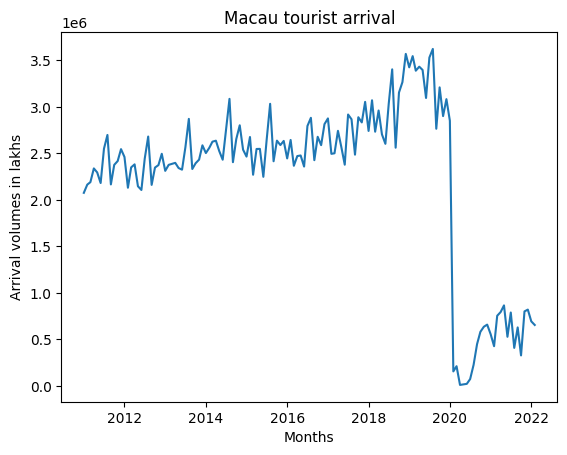

In [29]:
plt.plot(macau)
plt.title('Macau tourist arrival')
plt.xlabel("Months")
plt.ylabel("Arrival volumes in lakhs")
plt.show()

In [30]:
np.random.seed(7)

In [31]:
macau_ds = macau.values
macau_ds = macau_ds.astype('float32')

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
macau_ds = scaler.fit_transform(macau_ds)
len_macau = len(macau_ds)

In [33]:
train_size = int(len(macau_ds)*0.87)
test_size = len_macau - train_size
train, test = macau_ds[0:train_size, :], macau_ds[train_size:len_macau, :]
print(len(train), len(test))

116 18


In [34]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [35]:
def create_dataset(dataset, time_steps):
    X_data, Y_data = [], []
    for i in range(len(dataset) - time_steps - 1):
        ds = dataset[i:(i+time_steps), 0]
        X_data.append(ds)
        Y_data.append(dataset[i+time_steps,0])
    return np.array(X_data), np.array(Y_data) 

In [36]:
time_steps = 3
X_train, Y_train = create_dataset(train, time_steps)
X_test, Y_test = create_dataset(test, time_steps)

In [37]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [38]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, time_steps)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=50, verbose=0)

In [39]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 16ms/step


In [40]:
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])

In [41]:
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [42]:
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
print('Train score: %.2f RMSE' % (train_score))

Train score: 406857.14 RMSE


In [43]:
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print('Test score: %.2f RMSE' % (test_score))

Test score: 406979.99 RMSE


In [44]:
train_mape = mean_absolute_percentage_error(Y_train[0], train_predict[:, 0])
print('Train score: %.2f MAPE' % (train_mape))

Train score: 1.96 MAPE


In [45]:
test_mape = mean_absolute_percentage_error(Y_test[0], test_predict[:, 0])
print('Test score: %.2f MAPE' % (test_mape))

Test score: 0.70 MAPE


In [46]:
trainPredictPlot = np.empty_like(macau_ds)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(train_predict)+time_steps, :] = train_predict

In [47]:
testPredictPlot = np.empty_like(macau_ds)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_steps*2)+1:len_macau-1, :] = test_predict

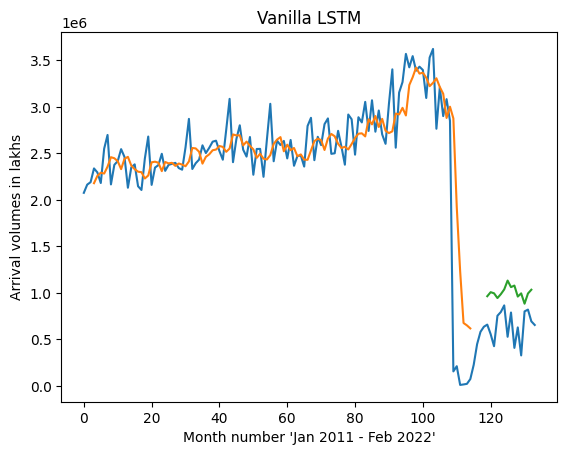

In [48]:
plt.plot(scaler.inverse_transform(macau_ds))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("Vanilla LSTM")
plt.xlabel("Month number 'Jan 2011 - Feb 2022'")
plt.ylabel("Arrival volumes in lakhs")
plt.show()

In [49]:
time_steps = 3
X_train, Y_train = create_dataset(train, time_steps)
X_test, Y_test = create_dataset(test, time_steps)

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [51]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, time_steps)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=50, verbose=0)

In [52]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 17ms/step


In [53]:
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])

In [54]:
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [55]:
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
print('Train score: %.2f RMSE' % (train_score))

Train score: 416521.56 RMSE


In [56]:
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print('Test score: %.2f RMSE' % (test_score))

Test score: 501449.99 RMSE


In [57]:
train_mape = mean_absolute_percentage_error(Y_train[0], train_predict[:, 0])
print('Train score: %.2f MAPE' % (train_mape))

Train score: 2.21 MAPE


In [58]:
test_mape = mean_absolute_percentage_error(Y_test[0], test_predict[:, 0])
print('Test score: %.2f MAPE' % (test_mape))

Test score: 0.88 MAPE


In [59]:
trainPredictPlot = np.empty_like(macau_ds)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(train_predict)+time_steps, :] = train_predict

In [60]:
testPredictPlot = np.empty_like(macau_ds)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_steps*2)+1:len_macau-1, :] = test_predict


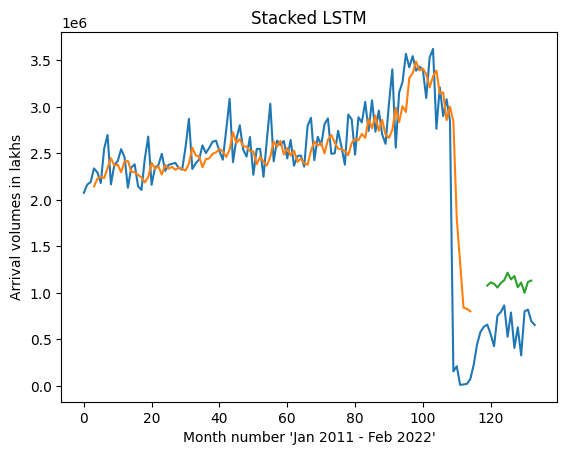

In [61]:
plt.plot(scaler.inverse_transform(macau_ds))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("Stacked LSTM")
plt.xlabel("Month number 'Jan 2011 - Feb 2022'")
plt.ylabel("Arrival volumes in lakhs")
plt.show()

In [62]:
time_steps = 3
X_train, Y_train = create_dataset(train, time_steps)
X_test, Y_test = create_dataset(test, time_steps)

In [63]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [64]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1, time_steps)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=50, verbose=0)

In [65]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 17ms/step


In [66]:
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])

In [67]:
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [68]:
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
print('Train score: %.2f RMSE' % (train_score))

Train score: 387864.73 RMSE


In [69]:
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print('Test score: %.2f RMSE' % (test_score))

Test score: 340047.36 RMSE


In [70]:
train_mape = mean_absolute_percentage_error(Y_train[0], train_predict[:, 0])
print('Train score: %.2f MAPE' % (train_mape))

Train score: 1.64 MAPE


In [71]:
test_mape = mean_absolute_percentage_error(Y_test[0], test_predict[:, 0])
print('Test score: %.2f MAPE' % (test_mape))

Test score: 0.57 MAPE


In [72]:
trainPredictPlot = np.empty_like(macau_ds)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(train_predict)+time_steps, :] = train_predict

In [73]:
testPredictPlot = np.empty_like(macau_ds)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_steps*2)+1:len_macau-1, :] = test_predict


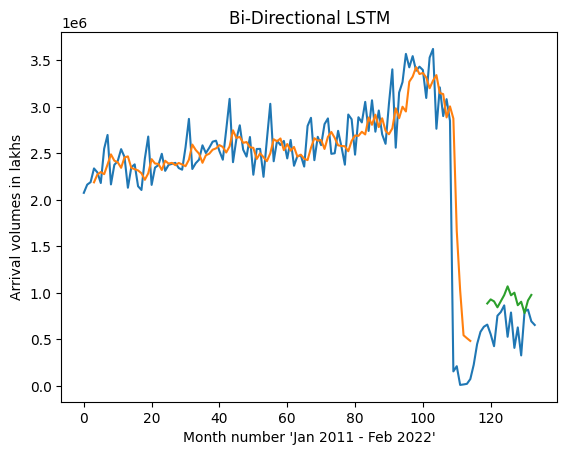

In [74]:
plt.plot(scaler.inverse_transform(macau_ds))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("Bi-Directional LSTM")
plt.xlabel("Number of Months")
plt.xlabel("Month number 'Jan 2011 - Feb 2022'")
plt.ylabel("Arrival volumes in lakhs")
plt.show()